In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [58]:
# Se importa el DF. Resta la propina del precio final del ticket y se reordena
df = pd.read_csv ('tips.csv', sep=',', encoding='utf-8')
df['bill'] = df['total_bill'] - df['tip'] 
column_names = ["bill", "tip", "total_bill", "sex", "somoker", "day", "time", "size"]
df = df.reindex(columns=column_names)
df

,bill,tip,total_bill,sex,somoker,day,time,size
0,15.98,1.01,16.99,Female,NaN,Sun,Dinner,2
1,8.68,1.66,10.34,Male,NaN,Sun,Dinner,3
2,17.51,3.50,21.01,Male,NaN,Sun,Dinner,3
3,20.37,3.31,23.68,Male,NaN,Sun,Dinner,2
4,20.98,3.61,24.59,Female,NaN,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,23.11,5.92,29.03,Male,NaN,Sat,Dinner,3
240,25.18,2.00,27.18,Female,NaN,Sat,Dinner,2
241,20.67,2.00,22.67,Male,NaN,Sat,Dinner,2
242,16.07,1.75,17.82,Male,NaN,Sat,Dinner,2


In [59]:
df.shape

(244, 8)

In [60]:
df.columns

Index(['bill', 'tip', 'total_bill', 'sex', 'somoker', 'day', 'time', 'size'], dtype='object')

In [61]:
df.total_bill.unique()

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 13.81, 11.02, 17.59,
       20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28,
       14.73, 10.51, 27.2 , 22.76, 17.29, 19.44, 16.66, 10.07, 32.68,
       15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49,  5.75,
       16.32, 22.75, 40.17, 27.28, 12.03, 12.46, 11.35, 15.38, 44.3 ,
       22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.  ,  7.25,
       38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69,
       13.42, 14.26, 15.95, 12.48, 29.8 ,  8.52, 14.52, 11.38, 22.82,
       19.08, 20.27,

In [62]:
df.total_bill.nunique()

229

In [63]:
df.describe().round(3)

,bill,tip,total_bill,somoker,size
count,244.000,244.000,244.000,0.0,244.000
mean,16.788,2.998,19.786,NaN,2.570
std,8.032,1.384,8.902,NaN,0.951
min,2.070,1.000,3.070,NaN,1.000
25%,11.000,2.000,13.348,NaN,2.000
50%,14.555,2.900,17.795,NaN,2.000
75%,20.685,3.562,24.127,NaN,3.000
max,43.170,10.000,50.810,NaN,6.000


In [87]:
df.bill.mean()

16.787663934426238

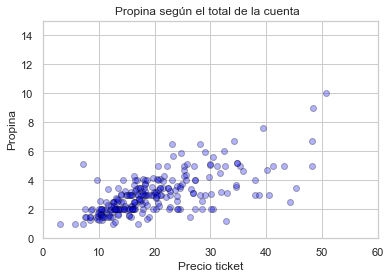

In [65]:
# Scatter plot para establecer relación entre precio total de la cuenta y la propina
x = df.total_bill
y = df.tip
colors = 'Blue'

plt.axis([0, 60, 0, 15])

# Plot

plt.scatter(x, y, c=colors, alpha=0.3, edgecolors='black')

plt.title('Propina según el total de la cuenta  ')
plt.ylabel('Propina')
plt.xlabel('Precio ticket')
plt.show()

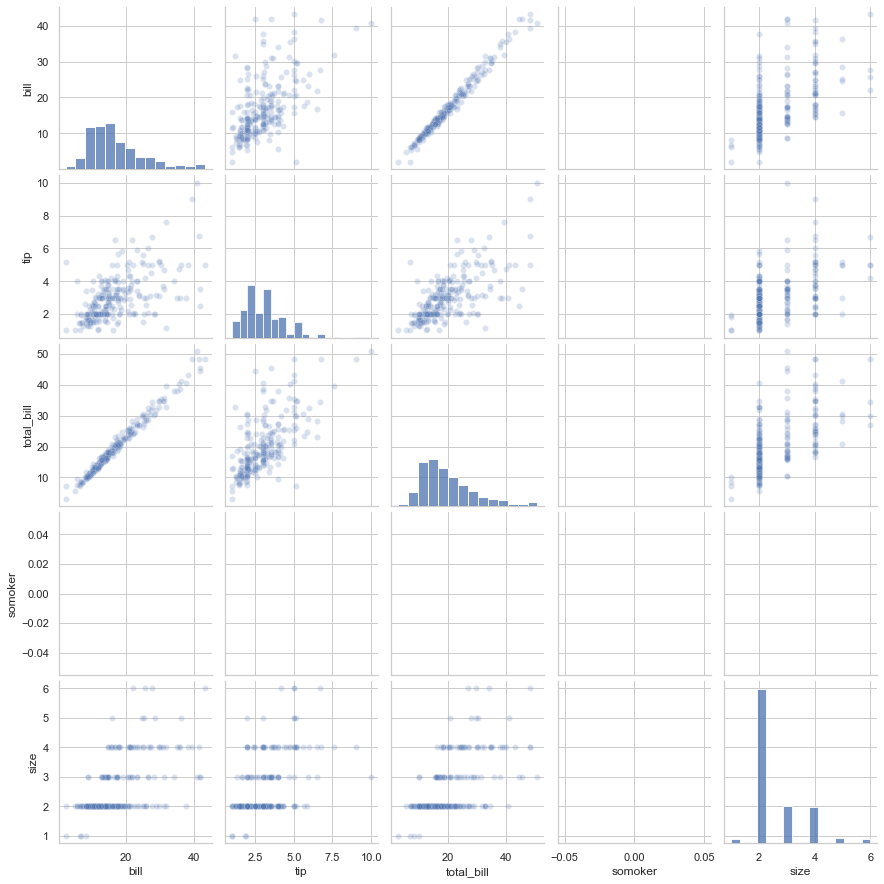

In [66]:
# matriz
sns.pairplot(df, diag_kind='hist', plot_kws={'alpha': 0.2})

Text(0.5, 0, 'Comensales')

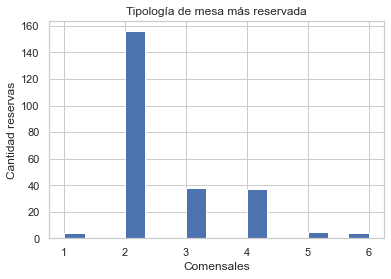

In [67]:
# Histograma que representa la tipologia de mesas más reservada
df.hist(['size'], bins=15)
plt.title('Tipología de mesa más reservada')
plt.ylabel('Cantidad reservas')
plt.xlabel('Comensales')

In [68]:
df.tip.mean()- df.tip.std()

1.6146404995234076

In [90]:
# varianza y desviación para las propinas
df.tip.var()

1.9144546380624725

In [91]:
df.tip.std()

1.3836381890011826

array([[<AxesSubplot:title={'center':'tip'}>]], dtype=object)

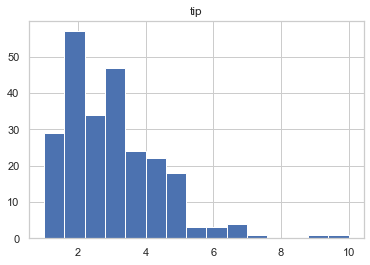

In [92]:
# Histograma con la propina
df.hist(['tip'], bins=15)

Text(0.5, 0, 'Size of the table')

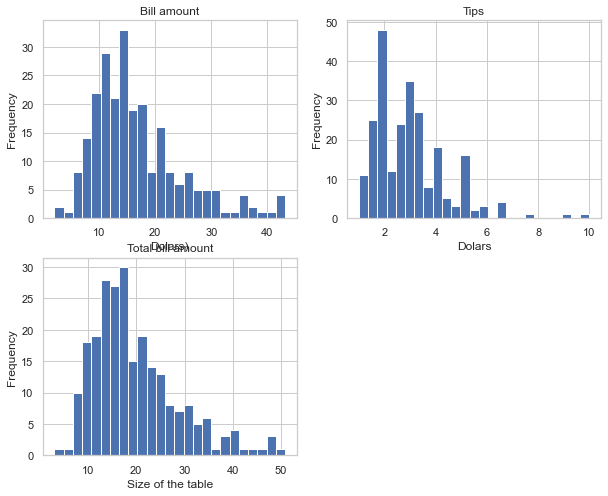

In [93]:
# matriz con varios graficos para comparar la relación entre cuenta, propina y precio de ticket.
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(df['bill'], bins=25)
plt.title('Bill amount')
plt.ylabel('Frequency')
plt.xlabel('Dolars)')

ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(df['tip'], bins=25)
plt.title('Tips')
plt.ylabel('Frequency')
plt.xlabel('Dolars')

ax3 = fig.add_subplot(2, 2, 3)

ax3.hist(df['total_bill'], bins=25)
plt.title('Total bill amount')
plt.ylabel('Frequency')
plt.xlabel('Size of the table')



In [75]:
df['bill'].describe()

count    244.000000
mean      16.787664
std        8.032459
min        2.070000
25%       11.000000
50%       14.555000
75%       20.685000
max       43.170000
Name: bill, dtype: float64

In [76]:
df['bill'].median()

14.555

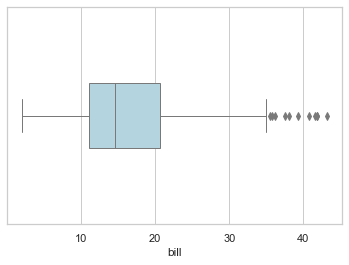

In [77]:
# boxplots para ver la distribución de los precios del precio de tiquet respecto la mediana
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["bill"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

<AxesSubplot:xlabel='bill'>

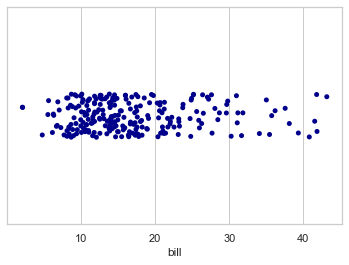

In [78]:
sns.stripplot(x=df["bill"], orient='v', color='darkblue')

<AxesSubplot:xlabel='bill'>

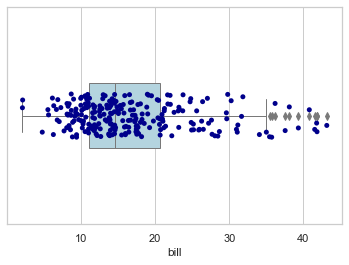

In [80]:
ax = sns.boxplot(x=df["bill"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
sns.stripplot(x=df["bill"], orient='v', color='darkblue')

In [81]:
df.total_bill

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

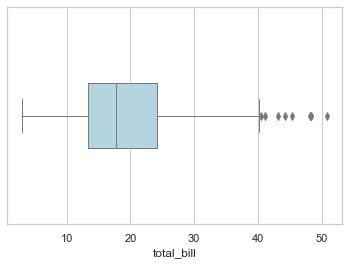

In [82]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["total_bill"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

<AxesSubplot:xlabel='total_bill'>

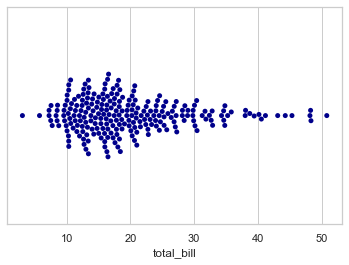

In [83]:
sns.swarmplot(x=df["total_bill"], orient='v', color='darkblue')

<AxesSubplot:xlabel='total_bill'>

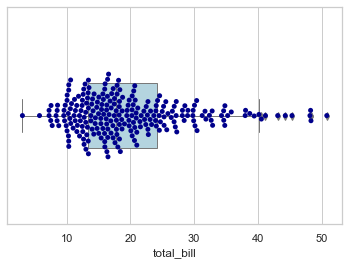

In [86]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["total_bill"], color='lightblue', fliersize=5,  orient='h', linewidth=1 , width=0.3)
sns.swarmplot(x=df["total_bill"], orient='h', color='darkblue')